### Import Libraries

In [1]:
import configparser as configparser
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import numpy as np

## Parsing INI File

### Funtion: To parse INI file

In [2]:
def parse_ini(section: str) -> dict:
    """
    This function parses ini file for configuration details
    :param section: section to read from ini
    :return: Dictionary of config details
    """
    config = dict()
    parser = configparser.ConfigParser()
    parser.read("imdb_database.ini")
    if parser.has_section(section):
        config_items = parser.items(section)
        for item in config_items:
            config[item[0]] = item[1]
    return config

In [3]:
mongo_config = parse_ini("mongodb")
mongo_config

{'host': 'localhost', 'database': 'imdb', 'port': '27017'}

## Extracting given data and plotting

### Connecting to IMDB MongoDB

In [4]:
connection_string = "mongodb://" + mongo_config['host'] + ":" + mongo_config['port']
mongo_client = pymongo.MongoClient(connection_string)
imdb = mongo_client[mongo_config['database']]
imdb

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'imdb')

In [5]:
movie_collection = imdb['Movies']

### 4.1 For each genre, a five-number summary of the average ratings of movies with more than 10K votes.

In [6]:
result = movie_collection.aggregate(
    [
    {
        '$match': {
            '$and': [
                {
                    'numVotes': {
                        '$gt': 10000
                    }
                }
            ]
        }
    }, {
        '$unwind': '$genres'
    }, {
        '$group': {
            '_id': '$genres', 
            'avgRatings': {
                '$push': '$avgRating'
            }
        }
    }
    ])

output = [res for res in result]
output

[{'_id': 'Documentary',
  'avgRatings': [7.4,
   7.6,
   7.6,
   8.4,
   7.2,
   8.6,
   7.8,
   8.1,
   9.2,
   7.7,
   7.5,
   7.3,
   8.1,
   9.3,
   7.9,
   7.8,
   8.2,
   8.6,
   7.6,
   8.0,
   6.9,
   7.5,
   9.1,
   8.2,
   8.1,
   8.5,
   8.0,
   8.3,
   7.9,
   8.2,
   8.0,
   8.4,
   7.8,
   7.6,
   7.8,
   7.6,
   8.0,
   9.0,
   7.9,
   7.3,
   8.0,
   8.1,
   6.6,
   7.6,
   7.7,
   8.2,
   8.6,
   7.5,
   8.4,
   8.0,
   8.0,
   7.8,
   8.3,
   8.0,
   7.5,
   7.8,
   7.2,
   7.2,
   7.9,
   5.2,
   8.6,
   7.8,
   7.5,
   6.4,
   7.9,
   7.7,
   8.0,
   8.0,
   7.4,
   7.6,
   7.0,
   7.4,
   7.4,
   8.4,
   9.4,
   7.2,
   7.9,
   7.6,
   5.5,
   7.5,
   7.1,
   8.0,
   8.5,
   7.6,
   7.4,
   3.7,
   7.7,
   7.6,
   6.0,
   8.1,
   7.0,
   6.3,
   2.5,
   7.5,
   8.5,
   7.7,
   7.9,
   8.1,
   7.9,
   8.0,
   7.6,
   1.6,
   7.4,
   7.8,
   8.4,
   8.2,
   8.5,
   7.5,
   7.6,
   7.2,
   9.0,
   8.6,
   9.1,
   7.6,
   7.4,
   7.4,
   7.7,
   7.1,
   8.0,
   7.5,
  

In [7]:
labels = []
data = []
for document in output:
    labels.append(document['_id'])
    data.append(document['avgRatings'])
print(labels)
print(data)

['Documentary', 'Talk-Show', 'Reality-TV', 'Western', 'Game-Show', 'News', 'Adventure', 'Family', 'Short', 'Mystery', 'Comedy', 'Crime', 'Drama', 'History', 'Horror', 'Sci-Fi', 'Romance', 'Music', 'Action', 'Biography', 'Fantasy', 'Musical', 'Film-Noir', 'Sport', 'Thriller', 'War', 'Animation']
[[7.4, 7.6, 7.6, 8.4, 7.2, 8.6, 7.8, 8.1, 9.2, 7.7, 7.5, 7.3, 8.1, 9.3, 7.9, 7.8, 8.2, 8.6, 7.6, 8.0, 6.9, 7.5, 9.1, 8.2, 8.1, 8.5, 8.0, 8.3, 7.9, 8.2, 8.0, 8.4, 7.8, 7.6, 7.8, 7.6, 8.0, 9.0, 7.9, 7.3, 8.0, 8.1, 6.6, 7.6, 7.7, 8.2, 8.6, 7.5, 8.4, 8.0, 8.0, 7.8, 8.3, 8.0, 7.5, 7.8, 7.2, 7.2, 7.9, 5.2, 8.6, 7.8, 7.5, 6.4, 7.9, 7.7, 8.0, 8.0, 7.4, 7.6, 7.0, 7.4, 7.4, 8.4, 9.4, 7.2, 7.9, 7.6, 5.5, 7.5, 7.1, 8.0, 8.5, 7.6, 7.4, 3.7, 7.7, 7.6, 6.0, 8.1, 7.0, 6.3, 2.5, 7.5, 8.5, 7.7, 7.9, 8.1, 7.9, 8.0, 7.6, 1.6, 7.4, 7.8, 8.4, 8.2, 8.5, 7.5, 7.6, 7.2, 9.0, 8.6, 9.1, 7.6, 7.4, 7.4, 7.7, 7.1, 8.0, 7.5, 7.1, 8.2, 7.4, 7.3, 7.6, 8.3, 1.6, 6.6, 6.7, 7.8, 8.1, 9.0, 9.1, 8.0, 7.6, 7.5, 7.3, 7.6, 8.0, 6.2, 9.

Text(0.5, 0.98, 'Five-Number Summary - Box Plot')

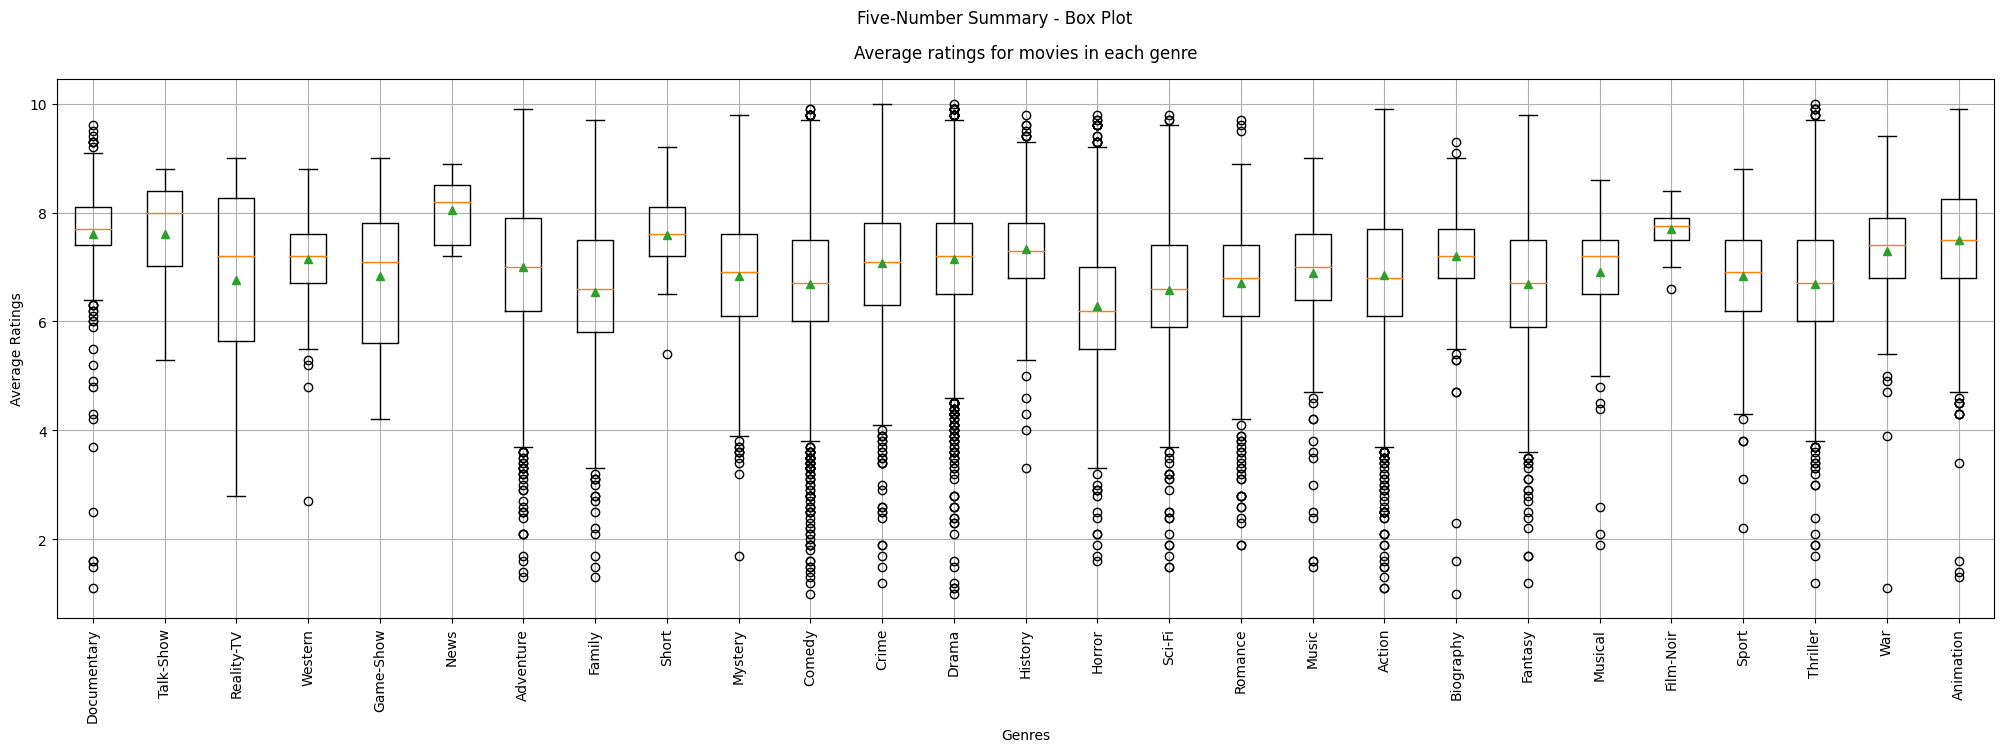

In [8]:
plt.figure(figsize=(25,7))
plt.grid()
plt.boxplot(data, labels=labels, showmeans=True, widths=0.5)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Average Ratings")
plt.title("Average ratings for movies in each genre", pad=15)
plt.suptitle("Five-Number Summary - Box Plot")

### 4.2 Average number of actors per movie by genre as a bar chart for all movies with any actors.

In [9]:
result = movie_collection.aggregate(
    [
    {
        '$match': {
            '$and': [
                {
                    'actors': {
                        '$exists': True
                    }
                }
            ]
        }
    }, {
        '$unwind': '$actors'
    }, {
        '$group': {
            '_id': {
                'id': '$_id', 
                'genres': '$genres'
            }, 
            'numOfActors': {
                '$sum': 1
            }
        }
    }, {
        '$unwind': '$_id.genres'
    }, {
        '$group': {
            '_id': '$_id.genres', 
            'avgActors': {
                '$avg': '$numOfActors'
            }
        }
    }
    ])

output = [res for res in result]
output

[{'_id': 'Biography', 'avgActors': 3.5887364841630687},
 {'_id': 'Horror', 'avgActors': 3.7083779573556614},
 {'_id': 'History', 'avgActors': 4.171480289621883},
 {'_id': 'Action', 'avgActors': 4.406236901668204},
 {'_id': 'Film-Noir', 'avgActors': 4.097972972972973},
 {'_id': 'Sport', 'avgActors': 5.209113825867752},
 {'_id': 'Reality-TV', 'avgActors': 4.680296213719791},
 {'_id': 'Talk-Show', 'avgActors': 5.456663408276311},
 {'_id': 'War', 'avgActors': 4.071981222289837},
 {'_id': 'Documentary', 'avgActors': 3.3258441565472547},
 {'_id': 'Adventure', 'avgActors': 4.425241282689913},
 {'_id': 'News', 'avgActors': 4.28475988887419},
 {'_id': 'Experimental', 'avgActors': 1.0},
 {'_id': 'Family', 'avgActors': 4.260046952438918},
 {'_id': 'Short', 'avgActors': 3.1492727372878884},
 {'_id': 'Mystery', 'avgActors': 4.0966466976559195},
 {'_id': 'Sci-Fi', 'avgActors': 3.958913220188684},
 {'_id': 'Drama', 'avgActors': 4.054095662214143},
 {'_id': 'Adult', 'avgActors': 4.108333333333333},
 {

In [10]:
labels = []
data = []
for document in output:
    labels.append(document['_id'])
    data.append(document['avgActors'])
print(labels)
print(data)

['Biography', 'Horror', 'History', 'Action', 'Film-Noir', 'Sport', 'Reality-TV', 'Talk-Show', 'War', 'Documentary', 'Adventure', 'News', 'Experimental', 'Family', 'Short', 'Mystery', 'Sci-Fi', 'Drama', 'Adult', 'Music', 'Romance', 'Fantasy', 'Musical', 'Animation', 'Western', 'Thriller', 'Game-Show', 'Crime', 'Comedy']
[3.5887364841630687, 3.7083779573556614, 4.171480289621883, 4.406236901668204, 4.097972972972973, 5.209113825867752, 4.680296213719791, 5.456663408276311, 4.071981222289837, 3.3258441565472547, 4.425241282689913, 4.28475988887419, 1.0, 4.260046952438918, 3.1492727372878884, 4.0966466976559195, 3.958913220188684, 4.054095662214143, 4.108333333333333, 4.150343476906186, 4.2340329326651345, 3.956133486766398, 4.027041301362628, 3.881968893444449, 4.2075607994221045, 3.9279489243894514, 5.777655233263483, 4.529450271980548, 4.2285691987200655]


Text(0.5, 0.98, 'Bar Plot')

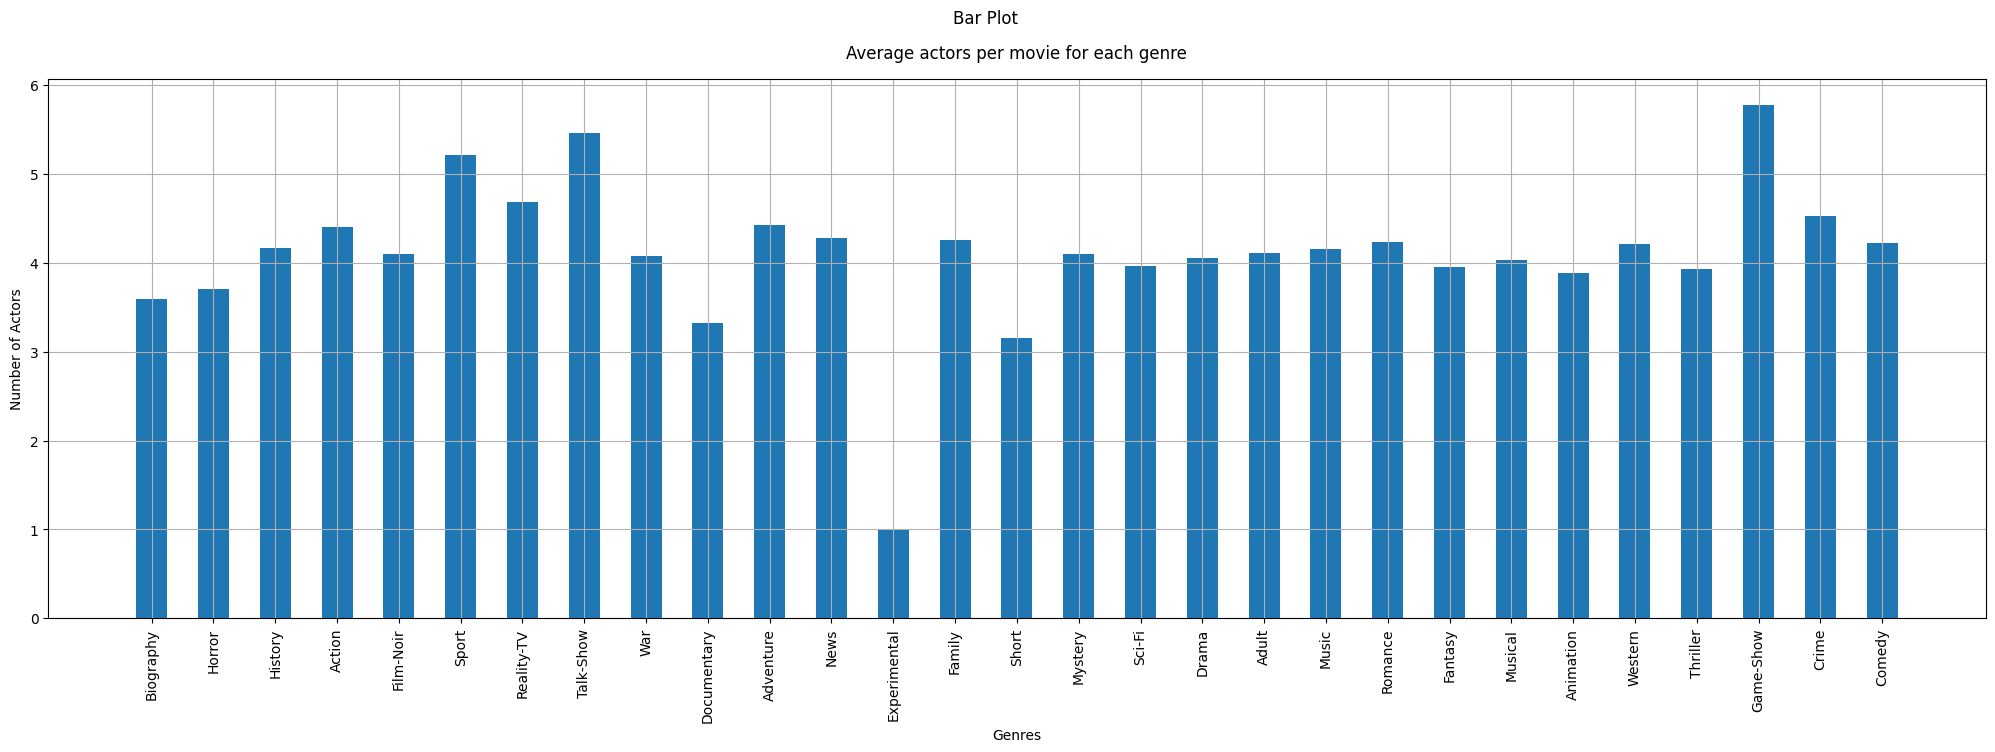

In [11]:
plt.figure(figsize=(25,7))
plt.grid()
plt.bar(labels, data, width=0.5)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Actors")
plt.title("Average actors per movie for each genre", pad=15)
plt.suptitle("Bar Plot")

### 4.3 Number of movies produced each year (startYear) as a time series plot.

In [12]:
result = movie_collection.aggregate(
    [
    {
        '$match': {
            '$and': [
                {
                    'startYear': {
                        '$exists': True
                    }
                }
            ]
        }
    }, {
        '$group': {
            '_id': '$startYear', 
            'numberOfMovies': {
                '$sum': 1
            }
        }
    }, {
        '$sort': {
            '_id': 1
        }
    }
])

output = [res for res in result]
output

[{'_id': 1874, 'numberOfMovies': 1},
 {'_id': 1877, 'numberOfMovies': 4},
 {'_id': 1878, 'numberOfMovies': 2},
 {'_id': 1881, 'numberOfMovies': 2},
 {'_id': 1882, 'numberOfMovies': 2},
 {'_id': 1883, 'numberOfMovies': 1},
 {'_id': 1885, 'numberOfMovies': 1},
 {'_id': 1887, 'numberOfMovies': 45},
 {'_id': 1888, 'numberOfMovies': 5},
 {'_id': 1889, 'numberOfMovies': 2},
 {'_id': 1890, 'numberOfMovies': 6},
 {'_id': 1891, 'numberOfMovies': 10},
 {'_id': 1892, 'numberOfMovies': 9},
 {'_id': 1893, 'numberOfMovies': 3},
 {'_id': 1894, 'numberOfMovies': 99},
 {'_id': 1895, 'numberOfMovies': 114},
 {'_id': 1896, 'numberOfMovies': 853},
 {'_id': 1897, 'numberOfMovies': 1356},
 {'_id': 1898, 'numberOfMovies': 1796},
 {'_id': 1899, 'numberOfMovies': 1820},
 {'_id': 1900, 'numberOfMovies': 1862},
 {'_id': 1901, 'numberOfMovies': 1768},
 {'_id': 1902, 'numberOfMovies': 1811},
 {'_id': 1903, 'numberOfMovies': 2676},
 {'_id': 1904, 'numberOfMovies': 1837},
 {'_id': 1905, 'numberOfMovies': 1704},
 {'_

In [13]:
labels = []
data = []
for document in output:
    labels.append(document['_id'])
    data.append(document['numberOfMovies'])
print(labels)
print(data)

[1874, 1877, 1878, 1881, 1882, 1883, 1885, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
[1, 4, 2, 2, 2, 1, 1, 45, 5, 2, 6, 10, 9, 3, 99, 114, 853, 1356, 1796, 1820, 1862, 1768, 1811

Text(0.5, 0.98, 'Time Series Plot')

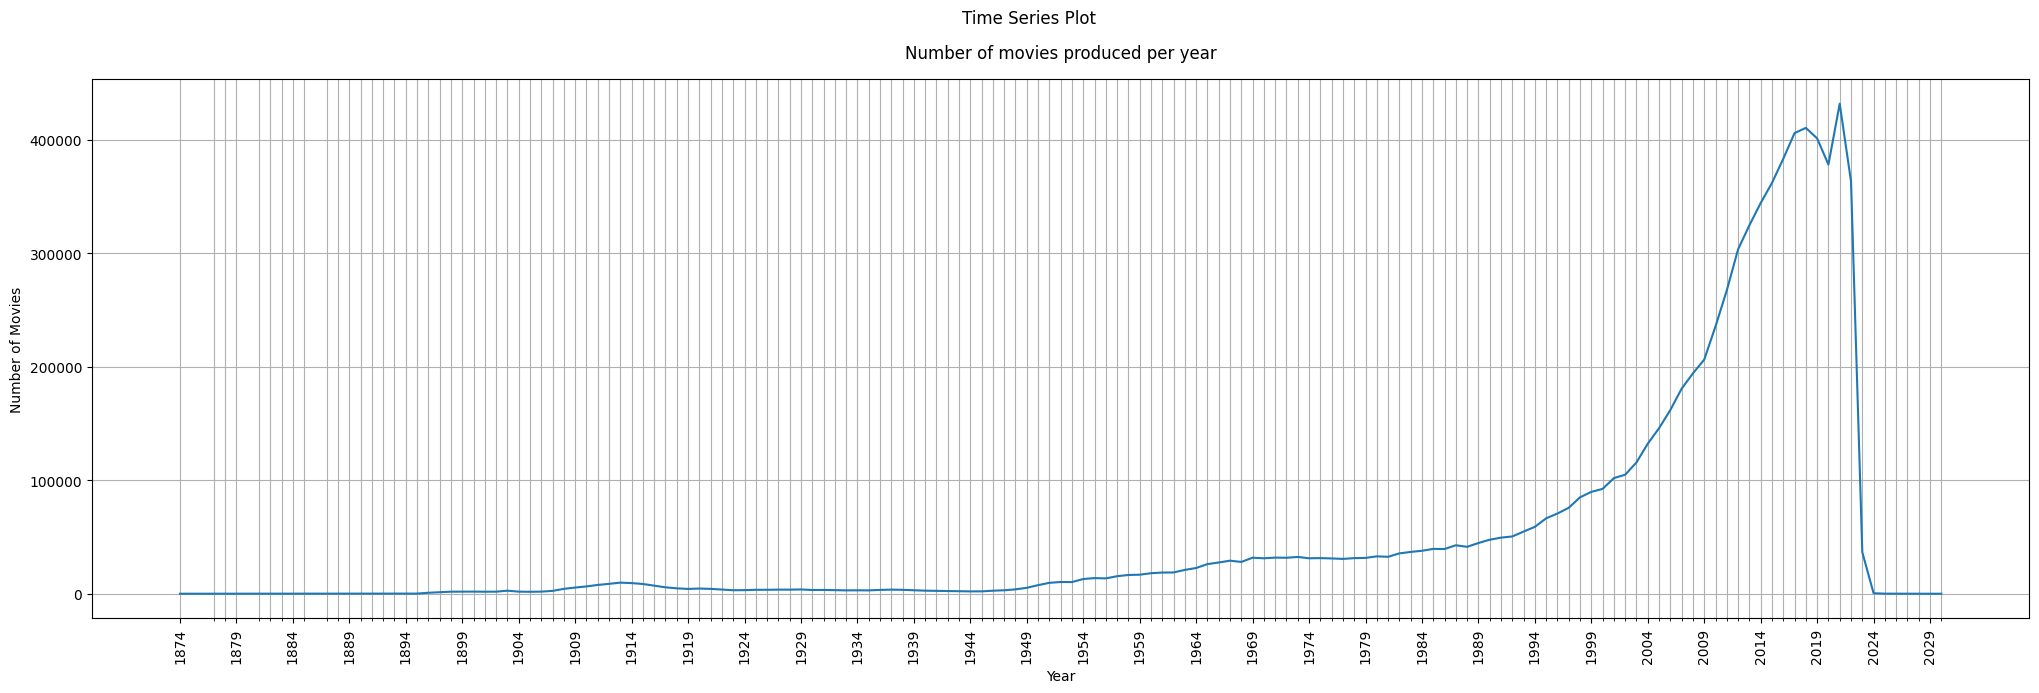

In [14]:
plt.figure(figsize=(25,7))
plt.grid()
plt.plot(labels, data)
plt.xticks(np.arange(min(labels), max(labels), step=5),rotation='vertical')
plt.xticks(labels, minor=True)
plt.grid(which='minor', alpha=1)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of movies produced per year", pad=15)
plt.suptitle("Time Series Plot")